## HANIF AJI PRASETYO
## 2141720090 / 17

# PENYELESAIAN

In [8]:
# INSTALL & IMPORT LIBRARIES
import numpy as np
import cv2
import matplotlib.pyplot as plt

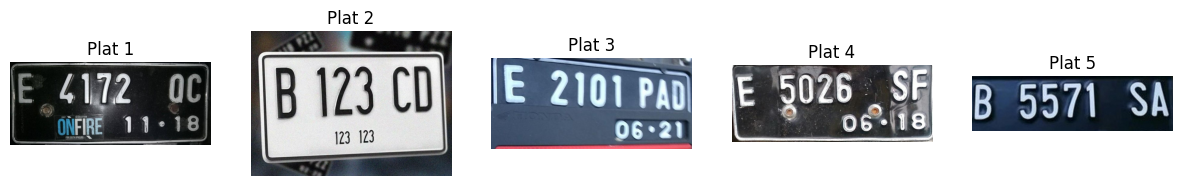

In [3]:
# # BACA 5 CITRA PLAT
# plats = ['/content/drive/MyDrive/Colab Notebooks/#1.jpg','/content/drive/MyDrive/Colab Notebooks/#2.jpg',
#          '/content/drive/MyDrive/Colab Notebooks/#3.jpg','/content/drive/MyDrive/Colab Notebooks/#4.jpg','/content/drive/MyDrive/Colab Notebooks/#5.jpg']
plats = ['plats/#1.jpg', 'plats/#2.jpg', 'plats/#3.jpg', 'plats/#4.jpg', 'plats/#5.jpg']

plt.figure(figsize=(15, 5))
# Mengambil dan menampilkan 5 citra plat
for i in range(5):
    image = cv2.imread(plats[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(image_rgb)
    plt.title(f'Plat {i+1}')
    plt.axis('off')
plt.show()

In [57]:
# Fungsi untuk plot piksel
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

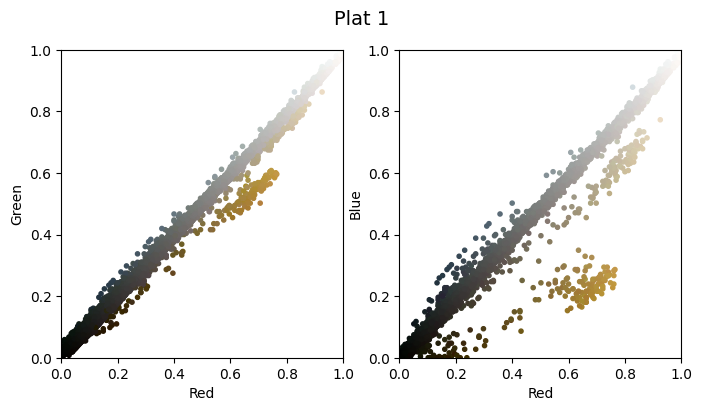

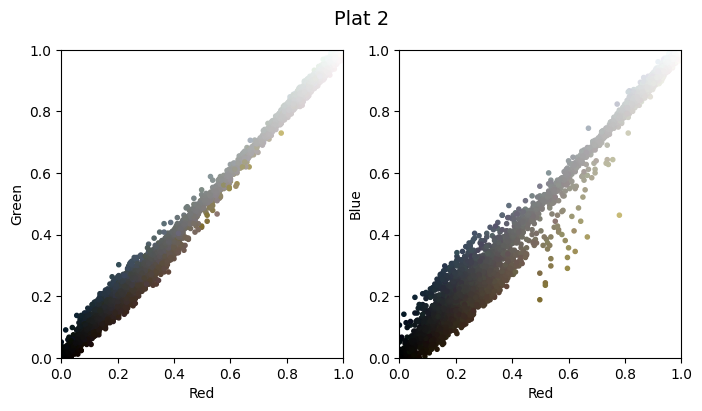

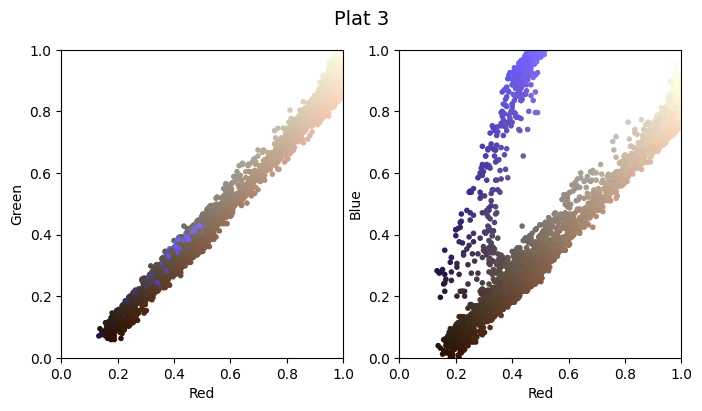

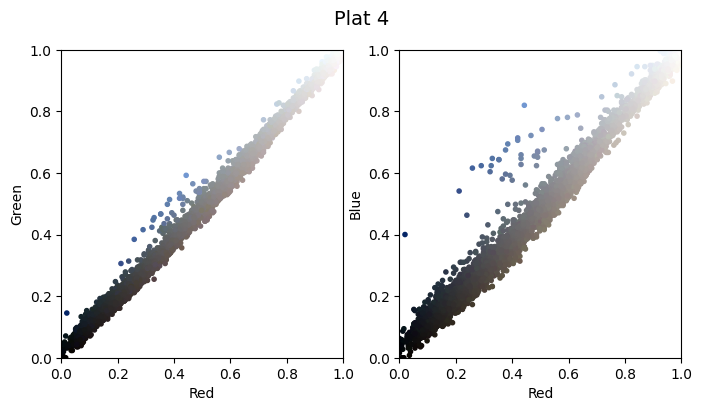

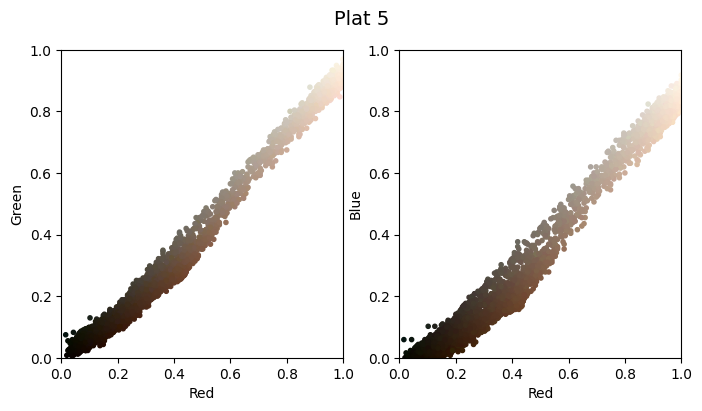

In [63]:
# Plot piksel plat 1
plat1 = cv2.imread(plats[0])
h1, w1, ch1= plat1.shape
data1 = plat1 / 255.0
data1 = data1.reshape(h1 * w1, ch1)
plot_pixels(data1, title='Plat 1')

# Plot piksel plat 2
plat2 = cv2.imread(plats[1])
h2, w2, ch2= plat2.shape
data2 = plat2 / 255.0
data2 = data2.reshape(h2 * w2, ch2)
plot_pixels(data2, title='Plat 2')

# Plot piksel plat 3
plat3 = cv2.imread(plats[2])
h3, w3, ch3= plat3.shape
data3 = plat3 / 255.0
data3 = data3.reshape(h3 * w3, ch3)
plot_pixels(data3, title='Plat 3')

# Plot piksel plat 4
plat4 = cv2.imread(plats[3])
h4, w4, ch4= plat4.shape
data4 = plat4 / 255.0
data4 = data4.reshape(h4 * w4, ch4)
plot_pixels(data4, title='Plat 4')

# Plot piksel plat 5
plat5 = cv2.imread(plats[4])
h5, w5, ch5= plat5.shape
data5 = plat5 / 255.0
data5 = data5.reshape(h5 * w5, ch5)
plot_pixels(data5, title='Plat 5')

In [79]:
# SEGMENTASI PADA CITRA DENGAN K-MEANS

# Fungsi untuk melakukan segmentasi citra dengan K-Means
def segmentasi_kmeans(image, k):
    # Konversi citra ke color space yang sesuai (misalnya, HSV)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Reshape citra ke format vektor dan mengubahnya menjadi np.float32
    pixels = hsv_image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Mengeksekusi K-Means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, cluster_centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Mengkonversi cluster_centers ke format integer
    cluster_centers = np.uint8(cluster_centers)

    # Mengganti warna setiap piksel sesuai dengan kluster
    segmented_image = cluster_centers[labels.flatten()]

    # Mengembalikan citra yang sudah direshape
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

# Fungsi untuk mengonversi citra menjadi citra biner
def convert_to_binary(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return binary

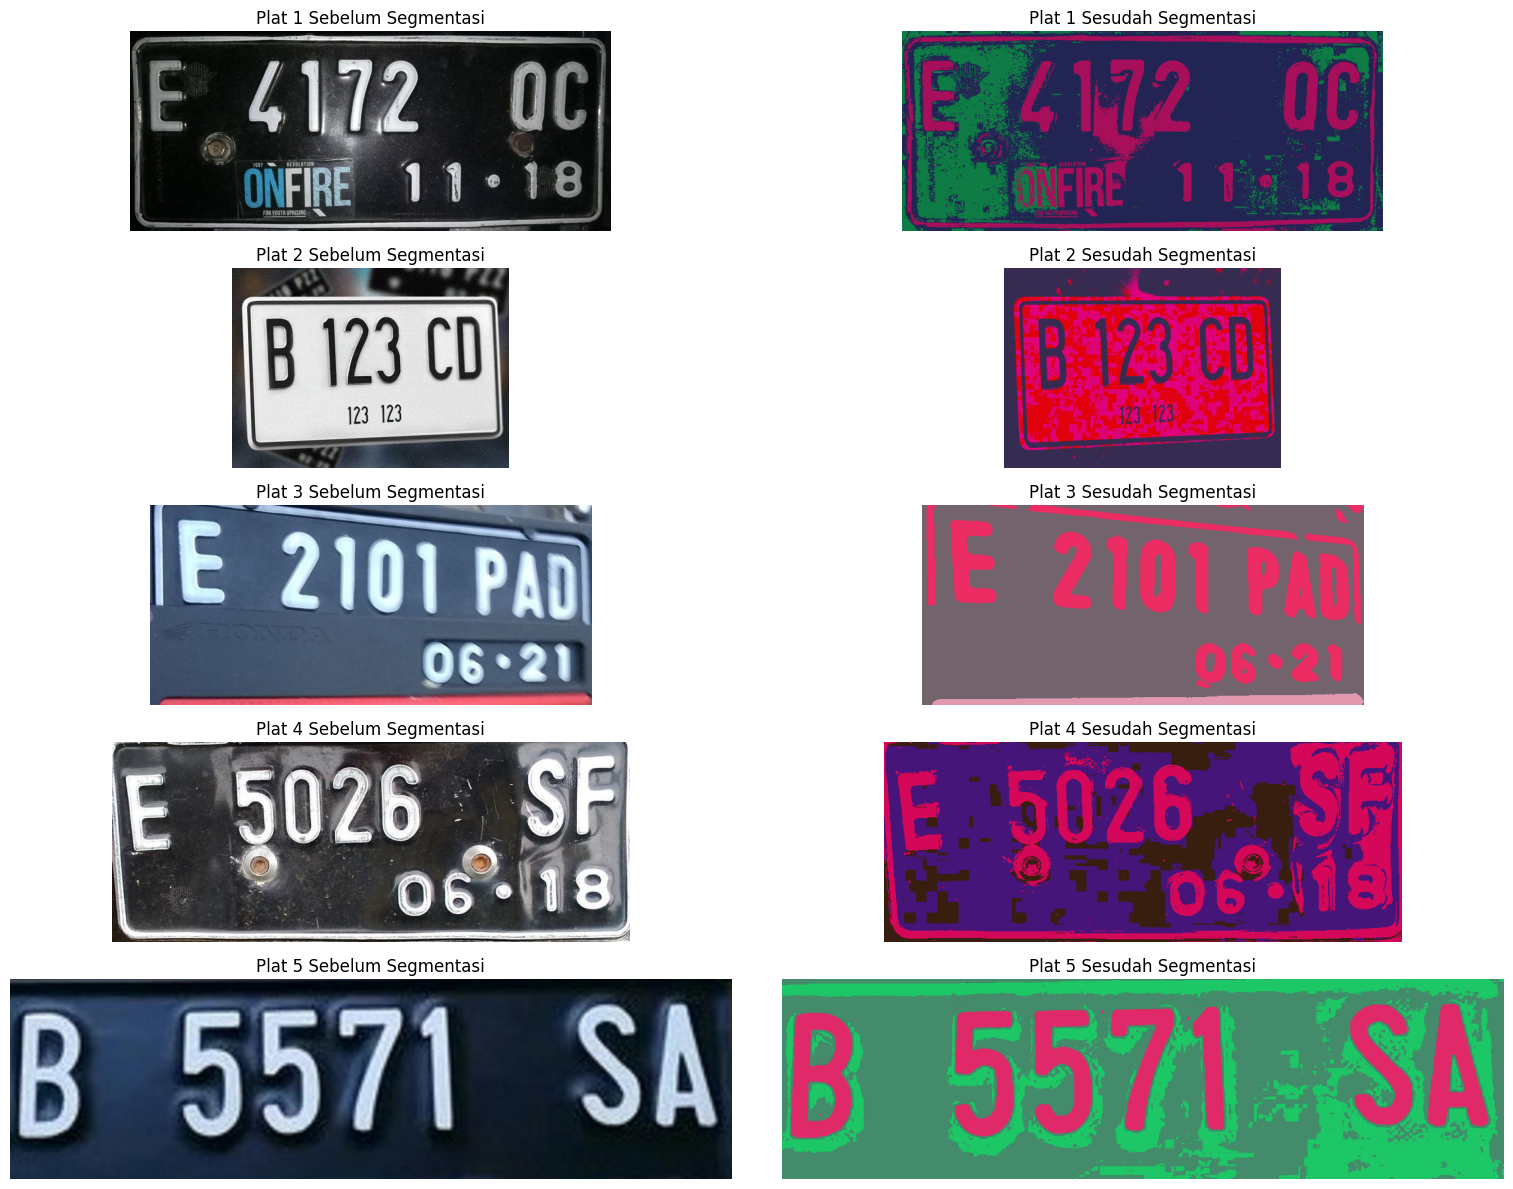

In [80]:
# Memuat 5 citra plat nomor
plat1 = cv2.imread(plats[0])
plat2 = cv2.imread(plats[1])
plat3 = cv2.imread(plats[2])
plat4 = cv2.imread(plats[3])
plat5 = cv2.imread(plats[4])

# Menentukan jumlah karakter pada plat nomor (jumlah kluster)
jumlah_karakter = 3

# Membuat list untuk citra-citra yang akan diolah
plat_list = [plat1, plat2, plat3, plat4, plat5]

# Membuat figure untuk menampilkan citra
plt.figure(figsize=(16, 12))

# Segmentasi citra plat dengan K-Means
for i, plat in enumerate(plat_list, start=1):
    # Segmentasi plat dengan K-Means
    plat_segmentasi = segmentasi_kmeans(plat, jumlah_karakter)

    # Menampilkan plat sebelum dan sesudah segmentasi
    plt.subplot(5, 2, i*2-1)
    plt.title(f"Plat {i} Sebelum Segmentasi")
    plt.imshow(cv2.cvtColor(plat, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(5, 2, i*2)
    plt.title(f"Plat {i} Sesudah Segmentasi")
    plt.imshow(cv2.cvtColor(plat_segmentasi, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

### Dalam studi kasus plat nomor, beberapa metrik evaluasi yang umum digunakan termasuk IoU (Intersection over Union), F1 Score, dan lainnya, juga dapat dilakukan evaluasi visual dengan memeriksa apakah hasil segmentasi sesuai dengan harapan.

## Berikut ini contoh cara melakukan evaluasi segmentasi pada kasus yang telah disediakan (dengan menggunakan IoU):

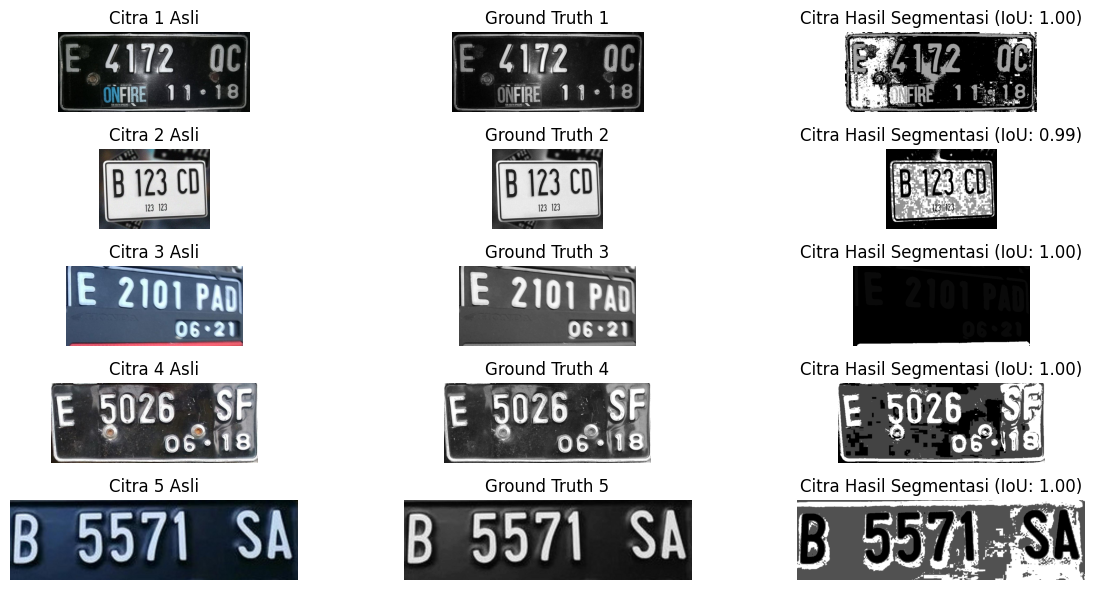

IoU Citra 1: 1.00
IoU Citra 2: 0.99
IoU Citra 3: 1.00
IoU Citra 4: 1.00
IoU Citra 5: 1.00


In [85]:
# Evaluasi hasil segmentasi dengan IoU(Intersection over Union)

# Fungsi untuk menghitung Intersection over Union (IoU)
def calculate_iou(ground_truth, predicted):
    intersection = np.logical_and(ground_truth, predicted)
    union = np.logical_or(ground_truth, predicted)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Membuat list untuk menyimpan IoU
iou_scores = []

# Membuat figure untuk menampilkan hasil evaluasi
plt.figure(figsize=(12, 6))

for i in range(len(plats)):
    # Memuat citra plat nomor asli dan ground truth
    citra_asli = cv2.imread(plats[i])
    citra_ground_truth = cv2.imread(plats[i], cv2.IMREAD_GRAYSCALE)

    # Segmentasi citra dengan K-Means
    citra_segmentasi = segmentasi_kmeans(citra_asli, jumlah_karakter)

   # Mengonversi citra hasil segmentasi menjadi citra grayscale
    citra_segmentasi_grayscale = cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2GRAY)

    # Menghitung IoU dan menambahkannya ke list IoU
    iou = calculate_iou(citra_ground_truth, citra_segmentasi_grayscale)
    iou_scores.append(iou)

    # Menampilkan citra asli, citra ground truth, dan citra hasil segmentasi
    plt.subplot(5, 3, i*3+1)
    plt.title(f"Citra {i + 1} Asli")
    plt.imshow(cv2.cvtColor(citra_asli, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(5, 3, i*3+2)
    plt.title(f"Ground Truth {i+1}")
    plt.imshow(citra_ground_truth, cmap='gray')
    plt.axis('off')

    plt.subplot(5, 3, i*3+3)
    plt.title(f"Citra Hasil Segmentasi (IoU: {iou:.2f})")
    plt.imshow(citra_segmentasi_grayscale, cmap='gray')
    plt.axis('off')

# Mengatur ruang antara baris
plt.subplots_adjust(hspace=0.3)

plt.tight_layout()
plt.show()

# Menampilkan hasil evaluasi IoU
for i, iou in enumerate(iou_scores, start=1):
    print(f"IoU Citra {i}: {iou:.2f}")